In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [23]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [24]:
prob = "CartPole"
window_size = 10
nb_episodes = 300

In [ ]:
base_path = f"C:\\Users\\nicle\\Desktop\\\Master-thesis-clean-code\\Results\\{prob}"



### Plot subfigures



In [26]:
CP_dict_auc_mean = {}
CP_dict_auc_std = {}


QRNN-ASNN-PF: AUC = 59305.33 ± 699.56
QRNN-basic-PF: AUC = 59243.67 ± 786.77
QRNN-rnd-PF: AUC = 59424.00 ± 531.74
QRNN-RS: AUC = 59418.67 ± 539.29
50NN-ASNN-PF: AUC = 59216.17 ± 794.06
50NN-basic-PF: AUC = 2591.33 ± 140.95
50NN-rnd-PF: AUC = 58768.67 ± 1458.53
50NN-RS: AUC = 59235.17 ± 798.79
MSENN-ASNN-PF: AUC = 59120.67 ± 829.56
MSENN-basic-PF: AUC = 59295.00 ± 714.18
MSENN-rnd-PF: AUC = 59091.83 ± 841.48
MSENN-RS: AUC = 59104.00 ± 954.75
############################################################# 

QRNN-ASNN-CEM: AUC = 59216.00 ± 825.90
QRNN-basic-CEM: AUC = 59053.50 ± 1055.71
QRNN-rnd-CEM: AUC = 59197.00 ± 852.77
50NN-ASNN-CEM: AUC = 59399.83 ± 565.92
50NN-basic-CEM: AUC = 3192.00 ± 146.33
50NN-rnd-CEM: AUC = 59543.00 ± 363.45
MSENN-ASNN-CEM: AUC = 58903.00 ± 838.72
MSENN-basic-CEM: AUC = 59156.00 ± 841.36
MSENN-rnd-CEM: AUC = 58964.67 ± 1137.78
############################################################# 

mean_rewards.shape  (300,) 

std_rewards.shape  (300,) 

DQN: AUC = 1719

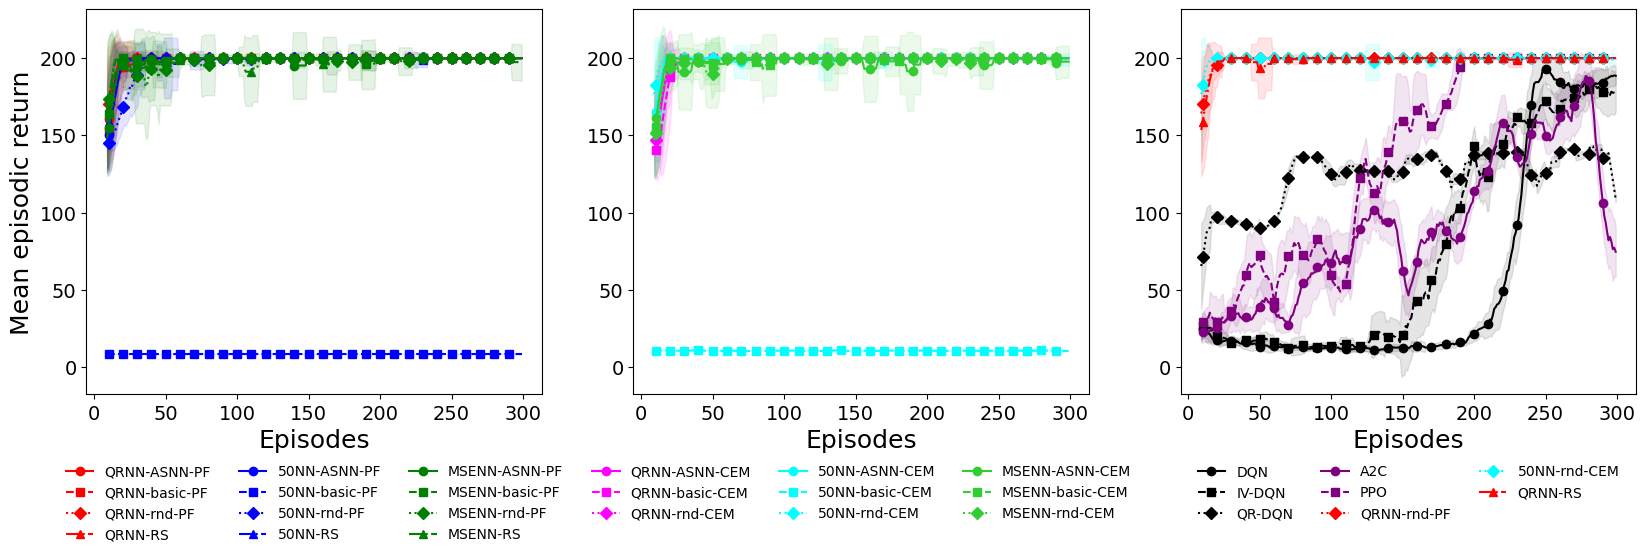

In [27]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
    '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
    'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
    '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

DQN_methods = {'DQN': f'{base_path}\\{prob}_DQN_results_July24.npz',
    'IV-DQN': f'{base_path}\\{prob}_IV_DQN_results_July24.npz',
    # 'QR-DQN': f'{base_path}\\{prob}_QR_DQN_results.npz',
    'QR-DQN': f'{base_path}\\{prob}_QR_DQN_results_300ep.npz',
    
    # 'DQN': f'C:\\Users\\nicle\\Desktop\\\Master-thesis-clean-code\\sb3\\{prob}_DQN_results.npz',
    # 'IV-DQN': f'C:\\Users\\nicle\\Desktop\\\Master-thesis-clean-code\\sb3\\{prob}_IV_DQN_results.npz',
    # 'QR-DQN': f'C:\\Users\\nicle\\Desktop\\\Master-thesis-clean-code\\sb3\\{prob}_QR_DQN_results.npz',
    }

color = 'black'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in DQN_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    print("mean_rewards.shape ", mean_rewards.shape, "\n")
    print("std_rewards.shape ", std_rewards.shape, "\n")
    
    # print("mean_rewards ", data['ep[]'], "\n")
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
RL_methods = {'A2C': f'{base_path}\\{prob}_A2C_results_June27.npz',
    'PPO': f'{base_path}\\{prob}_PPO_results_June27.npz',
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\\Master-thesis-clean-code-main\\\Master-thesis-clean-code-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\\Master-thesis-clean-code-main\\\Master-thesis-clean-code-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\\Master-thesis-clean-code-main\\\Master-thesis-clean-code-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\\Master-thesis-clean-code-main\\\Master-thesis-clean-code-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\\Master-thesis-clean-code-main\\\Master-thesis-clean-code-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\\Master-thesis-clean-code-main\\\Master-thesis-clean-code-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# QRNN random
color_QRNN_rnd = 'red'
marker_QRNN_rnd = markers[2]
linestyle_QRNN_rnd = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz')
mean_rewards_QRNN_rnd = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_rnd = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-rnd-PF: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_rnd = pd.Series(mean_rewards_QRNN_rnd).rolling(window=window_size).mean()
smoothed_std_QRNN_rnd = pd.Series(std_rewards_QRNN_rnd).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_rnd, 
            label="QRNN-rnd-PF", 
            color=color_QRNN_rnd,
            marker=marker_QRNN_rnd,
            linestyle=linestyle_QRNN_rnd,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_rnd)), 
                    smoothed_mean_QRNN_rnd - smoothed_std_QRNN_rnd, 
                    smoothed_mean_QRNN_rnd + smoothed_std_QRNN_rnd, 
                    color=color_QRNN_rnd, alpha=0.1)


# 50NN_random_CEM
color_50NN_rnd_CEM = 'aqua'
marker_50NN_rnd_CEM = markers[2]
linestyle_50NN_rnd_CEM = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz')
mean_rewards_50NN_rnd_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_rnd_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"50NN-rnd-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_rnd_CEM = pd.Series(mean_rewards_50NN_rnd_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_rnd_CEM = pd.Series(std_rewards_50NN_rnd_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_rnd_CEM, 
            label="50NN-rnd-CEM", 
            color=color_50NN_rnd_CEM,
            marker=marker_50NN_rnd_CEM,
            linestyle=linestyle_50NN_rnd_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_rnd_CEM)), 
                    smoothed_mean_50NN_rnd_CEM - smoothed_std_50NN_rnd_CEM, 
                    smoothed_mean_50NN_rnd_CEM + smoothed_std_50NN_rnd_CEM, 
                    color=color_50NN_rnd_CEM, alpha=0.1)

# QRNN_RS
color_QRNN_RS = 'red'
marker_QRNN_RS = markers[3]
linestyle_QRNN_RS = linestyles[3]
# data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz')
data = np.load(f'{base_path}\\{prob}_RS_mid_50NN_May6.npz')
mean_rewards_QRNN_RS = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_RS = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-RS: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_RS = pd.Series(mean_rewards_QRNN_RS).rolling(window=window_size).mean()
smoothed_std_QRNN_RS = pd.Series(std_rewards_QRNN_RS).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_RS, 
            label="QRNN-RS", 
            color=color_QRNN_RS,
            marker=marker_QRNN_RS,
            linestyle=linestyle_QRNN_RS,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_RS)), 
                    smoothed_mean_QRNN_RS - smoothed_std_QRNN_RS, 
                    smoothed_mean_QRNN_RS + smoothed_std_QRNN_RS, 
                    color=color_QRNN_RS, alpha=0.1)



# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



In [28]:
sorted_dict = dict(sorted(CP_dict_auc_mean.items(), key=lambda item: item[1], reverse=True)[:6])
sorted_dict


{'50NN-rnd-CEM': 59543.0,
 'QRNN-rnd-PF': 59424.0,
 'QRNN-RS': 59418.666666666664,
 '50NN-ASNN-CEM': 59399.833333333336,
 'QRNN-ASNN-PF': 59305.333333333336,
 'MSENN-basic-PF': 59295.0}

In [29]:
CP_dict_auc_mean, CP_dict_auc_std


({'QRNN-ASNN-PF': 59305.333333333336,
  'QRNN-basic-PF': 59243.666666666664,
  'QRNN-rnd-PF': 59424.0,
  'QRNN-RS': 59418.666666666664,
  '50NN-ASNN-PF': 59216.166666666664,
  '50NN-basic-PF': 2591.3333333333335,
  '50NN-rnd-PF': 58768.666666666664,
  '50NN-RS': 59235.166666666664,
  'MSENN-ASNN-PF': 59120.666666666664,
  'MSENN-basic-PF': 59295.0,
  'MSENN-rnd-PF': 59091.833333333336,
  'MSENN-RS': 59104.0,
  'QRNN-ASNN-CEM': 59216.0,
  'QRNN-basic-CEM': 59053.5,
  'QRNN-rnd-CEM': 59197.0,
  '50NN-ASNN-CEM': 59399.833333333336,
  '50NN-basic-CEM': 3192.0,
  '50NN-rnd-CEM': 59543.0,
  'MSENN-ASNN-CEM': 58903.0,
  'MSENN-basic-CEM': 59156.0,
  'MSENN-rnd-CEM': 58964.666666666664,
  'DQN': 17194.333333333332,
  'IV-DQN': 22942.166666666668,
  'QR-DQN': 36698.833333333336,
  'A2C': 26731.0,
  'PPO': 40018.166666666664},
 {'QRNN-ASNN-PF': 699.564308853891,
  'QRNN-basic-PF': 786.7741452002319,
  'QRNN-rnd-PF': 531.7442994522837,
  'QRNN-RS': 539.2867717849402,
  '50NN-ASNN-PF': 794.0577574

In [30]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\\\CP_auc_mean.json', 'w') as f:
    json.dump(CP_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\CP_auc_std.json', 'w') as f:
    json.dump(CP_dict_auc_std, f)


In [31]:
for key, value in CP_dict_auc_mean.items():
    print(f"{key}: {value:.2f} ± {CP_dict_auc_std[key]:.2f}")
    

QRNN-ASNN-PF: 59305.33 ± 699.56
QRNN-basic-PF: 59243.67 ± 786.77
QRNN-rnd-PF: 59424.00 ± 531.74
QRNN-RS: 59418.67 ± 539.29
50NN-ASNN-PF: 59216.17 ± 794.06
50NN-basic-PF: 2591.33 ± 140.95
50NN-rnd-PF: 58768.67 ± 1458.53
50NN-RS: 59235.17 ± 798.79
MSENN-ASNN-PF: 59120.67 ± 829.56
MSENN-basic-PF: 59295.00 ± 714.18
MSENN-rnd-PF: 59091.83 ± 841.48
MSENN-RS: 59104.00 ± 954.75
QRNN-ASNN-CEM: 59216.00 ± 825.90
QRNN-basic-CEM: 59053.50 ± 1055.71
QRNN-rnd-CEM: 59197.00 ± 852.77
50NN-ASNN-CEM: 59399.83 ± 565.92
50NN-basic-CEM: 3192.00 ± 146.33
50NN-rnd-CEM: 59543.00 ± 363.45
MSENN-ASNN-CEM: 58903.00 ± 838.72
MSENN-basic-CEM: 59156.00 ± 841.36
MSENN-rnd-CEM: 58964.67 ± 1137.78
DQN: 17194.33 ± 218.63
IV-DQN: 22942.17 ± 1869.13
QR-DQN: 36698.83 ± 22378.26
A2C: 26731.00 ± 4120.32
PPO: 40018.17 ± 3158.19
